In [1]:
from sklearn import tree
import pandas as pd
import os

In [2]:
data = pd.read_csv('../data/bio_vars_frame.csv')

In [3]:
# data.drop(['Unnamed: 0'], axis = 1, inplace = True)
data.dropna(axis = 0, how = 'any', inplace = True)
data.rename(columns={'bio_1': 'Annual Mean Temperature', 
                     'bio_2': 'Mean Diurnal Range (Mean of monthly (max temp - min temp))',
                     'bio_3': 'Isothermality',
                     'bio_4': 'Temperature Seasonality',
                     'bio_5': 'Max Temperature of Warmest Month',
                     'bio_6': 'Min Temperature of Coldest Month',
                     'bio_7': 'Temperature Annual Range',
                     'bio_8': 'Mean Temperature of Wettest Quarter',
                     'bio_9': 'Mean Temperature of Driest Quarter',
                     'bio_10': 'Mean Temperature of Warmest Quarter',
                     'bio_11': 'Mean Temperature of Coldest Quarter',
                     'bio_12': 'Annual Precipitation',
                     'bio_13': 'Precipitation of Wettest Month',
                     'bio_14': 'Precipitation of Driest Month',
                     'bio_15': 'Precipitation Seasonality (Coefficient of Variation)',
                     'bio_16': 'Precipitation of Wettest Quarter',
                     'bio_17': 'Precipitation of Driest Quarter',
                     'bio_18': 'Precipitation of Warmest Quarter',
                     'bio_19': 'Precipitation of Coldest Quarter',
                    }, inplace=True)
data.drop(['Unnamed: 0', 
           'Max Temperature of Warmest Month', 
           'Min Temperature of Coldest Month', 
           'Precipitation of Wettest Month', 
           'Precipitation of Driest Month', 
           'Precipitation Seasonality (Coefficient of Variation)', 
           'Mean Diurnal Range (Mean of monthly (max temp - min temp))', 
           'Temperature Annual Range', 'Annual Mean Temperature', 
           'Isothermality', 
           'Temperature Seasonality', 
           'Annual Precipitation'], axis=1, inplace=True)
data.head()

,Mean Temperature of Wettest Quarter,Mean Temperature of Driest Quarter,Mean Temperature of Warmest Quarter,Mean Temperature of Coldest Quarter,Precipitation of Wettest Quarter,Precipitation of Driest Quarter,Precipitation of Warmest Quarter,Precipitation of Coldest Quarter,raster_frame
0,35.0,165.0,167.0,30.0,1008.0,144.0,147.0,951.0,0
1,34.0,163.0,165.0,28.0,1019.0,142.0,146.0,961.0,0
2,35.0,165.0,167.0,30.0,1002.0,140.0,144.0,945.0,0
3,35.0,166.0,168.0,30.0,993.0,139.0,143.0,937.0,0
4,32.0,163.0,164.0,27.0,1023.0,138.0,143.0,966.0,0


In [4]:
data.dtypes

Mean Temperature of Wettest Quarter    float64
Mean Temperature of Driest Quarter     float64
Mean Temperature of Warmest Quarter    float64
Mean Temperature of Coldest Quarter    float64
Precipitation of Wettest Quarter       float64
Precipitation of Driest Quarter        float64
Precipitation of Warmest Quarter       float64
Precipitation of Coldest Quarter       float64
raster_frame                             int64
dtype: object

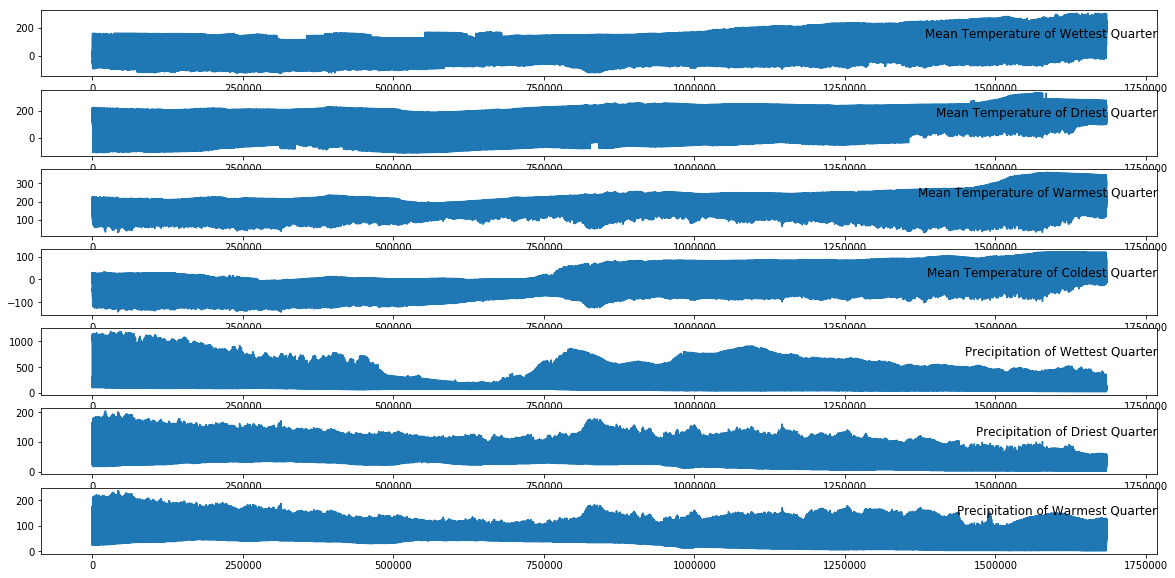

In [6]:
from matplotlib import pyplot
i=1
values = data.values
pyplot.figure(figsize=(20,10))
for feature in range(0,7):
    pyplot.subplot(7, 1, i)
    pyplot.plot(values[:, feature])
    pyplot.title(data.columns[feature], y=0.5, loc='right')
    i += 1
pyplot.show()

In [7]:
X = data.drop('raster_frame', axis = 1)
y = data['raster_frame']
print(X.shape, y.shape)
print(X.dtypes)

(1684856, 8) (1684856,)
Mean Temperature of Wettest Quarter    float64
Mean Temperature of Driest Quarter     float64
Mean Temperature of Warmest Quarter    float64
Mean Temperature of Coldest Quarter    float64
Precipitation of Wettest Quarter       float64
Precipitation of Driest Quarter        float64
Precipitation of Warmest Quarter       float64
Precipitation of Coldest Quarter       float64
dtype: object


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1, stratify=y)

X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)

X_test_scaled = X_scaler.transform(X_test)

Using TensorFlow backend.


In [42]:
# Different model i t ried
from keras.models import Sequential
from keras.layers import Dense, Dropout

# model = Sequential()
# model.add(Dense(units=100, activation='relu', input_dim=8))
# model.add(Dense(units=100, activation='sigmoid'))
# model.add(Dense(units=1, activation='softmax'))

model = Sequential()
model.add(Dense(64, input_dim=8, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
model.fit(
    X_train_scaled,
    y_train,
    epochs=10,
    shuffle=True,
    verbose=2)

Epoch 1/10
 - 41s - loss: 0.2442 - acc: 0.9087
Epoch 2/10
 - 40s - loss: 0.2299 - acc: 0.9091
Epoch 3/10
 - 40s - loss: 0.2247 - acc: 0.9090
Epoch 4/10
 - 38s - loss: 0.2211 - acc: 0.9090
Epoch 5/10
 - 36s - loss: 0.2191 - acc: 0.9090
Epoch 6/10
 - 36s - loss: 0.2174 - acc: 0.9090
Epoch 7/10
 - 36s - loss: 0.2160 - acc: 0.9091
Epoch 8/10
 - 39s - loss: 0.2150 - acc: 0.9092
Epoch 9/10
 - 38s - loss: 0.2141 - acc: 0.9092
Epoch 10/10
 - 39s - loss: 0.2131 - acc: 0.9094


In [10]:
# trying a different learning rate
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(64, input_dim=8, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

sgd = optimizers.SGD(lr=0.01, clipvalue=0.5)
model.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])
model.fit(
    X_train_scaled,
    y_train,
    epochs=10,
    shuffle=True,
    verbose=2)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
 - 44s - loss: 0.2438 - acc: 0.9090
Epoch 2/10
 - 42s - loss: 0.2294 - acc: 0.9091
Epoch 3/10
 - 38s - loss: 0.2241 - acc: 0.9091
Epoch 4/10
 - 40s - loss: 0.2205 - acc: 0.9090
Epoch 5/10
 - 39s - loss: 0.2185 - acc: 0.9090
Epoch 6/10
 - 41s - loss: 0.2167 - acc: 0.9089
Epoch 7/10
 - 39s - loss: 0.2152 - acc: 0.9090
Epoch 8/10
 - 40s - loss: 0.2141 - acc: 0.9090
Epoch 9/10
 - 40s - loss: 0.2132 - acc: 0.9090
Epoch 10/10
 - 38s - loss: 0.2124 - acc: 0.9091


In [11]:
from keras.models import load_model

model.save('CNNSequential.h5')

model = load_model('CNNSequential.h5')

In [12]:
training_prediction = model.predict(X_train_scaled)
testing_prediction = model.predict(X_test_scaled)

print(f'Training Probability: {training_prediction[0].dtype}')
print(f'Testing Probability: {testing_prediction}')


Training Probability: float32
Testing Probability: [[3.3794105e-02]
 [1.9924727e-01]
 [2.0656583e-01]
 ...
 [8.3680206e-06]
 [2.1808988e-01]
 [2.6882313e-02]]


In [13]:
print(len(testing_prediction))
print(len(X_test_scaled))

421214
421214
